In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud, STOPWORDS

In [2]:
file_names = ['../data/北京apm.csv', '../data/王府中環.csv', '../data/王府井百货.csv', '../data/东方新天地.csv']
df1 = pd.read_csv(file_names[0], header=0)
df2 = pd.read_csv(file_names[1], header=0)
df3 = pd.read_csv(file_names[2], header=0)
df4 = pd.read_csv(file_names[3], header=0)

# For Store1 : 北京apm

### 1.  Mean of the Score Data

In [3]:
facs_mean = df1['facs_score'].mean()
envr_mean = df1['envr_score'].mean()
serv_mean = df1['serv_score'].mean()
avg_mean = df1['avg_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)
avg_mean = round(avg_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean, avg_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv', 'avg'])

print(df)

      Score Mean
facs        4.57
envr        4.58
serv        4.52
avg         4.56


### 2. Distribution of the Score Data

In [4]:
facs_score_counts = df1['facs_score'].value_counts().sort_index()
envr_score_counts = df1['envr_score'].value_counts().sort_index()
serv_score_counts = df1['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,52,49,59
1.0,1,2,8
1.5,8,6,7
2.0,5,5,7
2.5,43,35,50
3.0,47,36,45
3.5,204,213,253
4.0,520,512,571
4.5,1072,1060,1067
5.0,2306,2340,2191


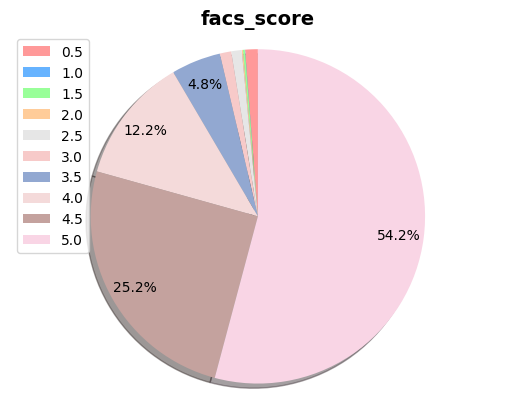

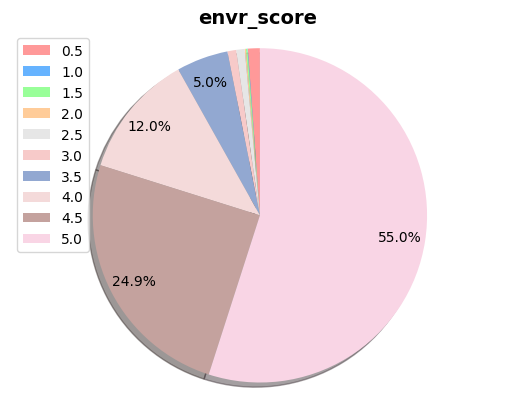

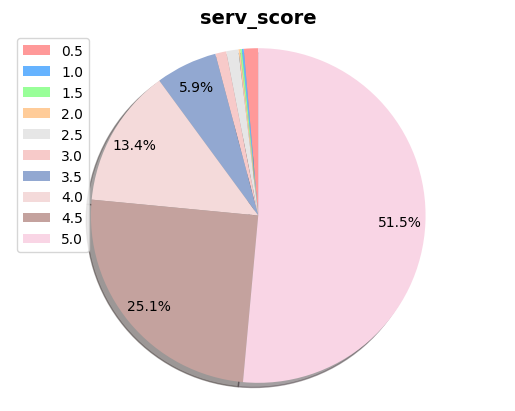

In [5]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    
    # Save the chart with the title as the filename
    plt.savefig(f"../images/{title}_apm.png")
    
    # Show the chart
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [6]:
df1['time'] = pd.to_datetime(df1['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df1['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

   Year  Count
0  2020   1848
1  2021   1079
2  2022    980
3  2023    351


### 4. Simple Splitting and Wordcloud for Review Text 

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/st/jr2134cd02575p7pnq8xy5440000gn/T/jieba.cache
Loading model cost 0.296 seconds.
Prefix dict has been built successfully.


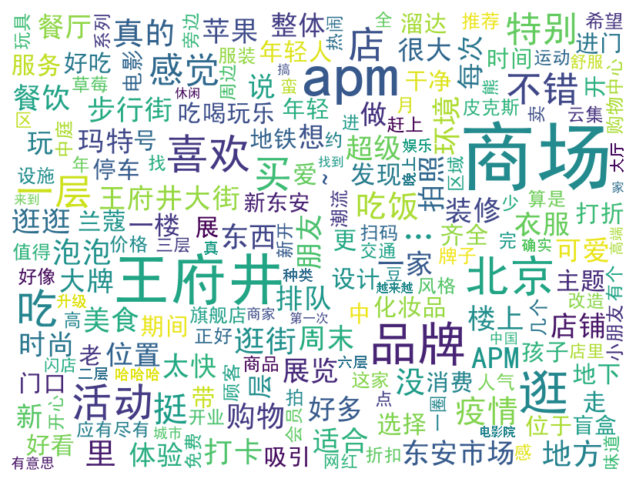

In [7]:
# Load stopwords
stopwords = set(pd.read_csv('stopwords/stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df1)):
    segs = jieba.lcut(df1.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_apm.png")

# For Store2 : 王府中環

### 1.  Mean of the Score Data

In [8]:
facs_mean = df2['facs_score'].mean()
envr_mean = df2['envr_score'].mean()
serv_mean = df2['serv_score'].mean()
avg_mean = df2['avg_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)
avg_mean = round(avg_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean, avg_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv', 'avg'])

print(df)

      Score Mean
facs        4.67
envr        4.69
serv        4.57
avg         4.64


### 2. Distribution of the Score Data

In [9]:
facs_score_counts = df2['facs_score'].value_counts().sort_index()
envr_score_counts = df2['envr_score'].value_counts().sort_index()
serv_score_counts = df2['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,23,24,44
1.0,2,2,2
1.5,2,1,5
2.0,3,1,10
2.5,16,10,18
3.0,11,12,26
3.5,100,98,144
4.0,301,276,397
4.5,814,780,825
5.0,1899,1967,1700


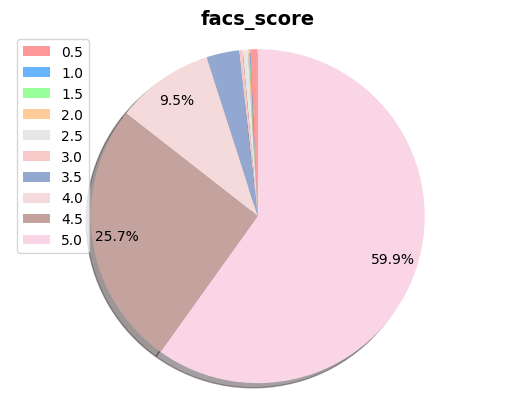

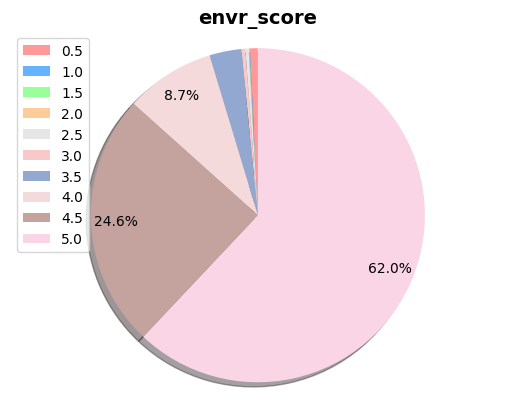

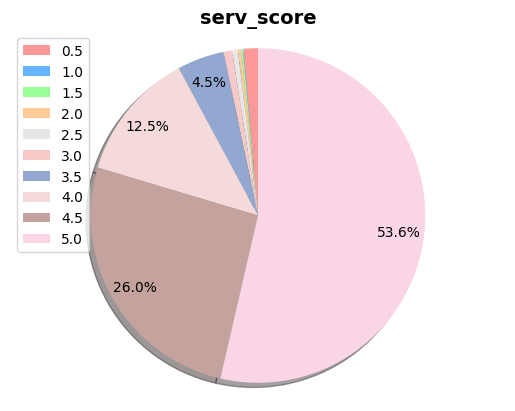

In [10]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    
    # Save the chart with the title as the filename
    plt.savefig(f"../images/{title}_zhonghuan.png")
    
    # Show the chart
    plt.show()

### 3. Counting the Number of Different Years of 'Time'

In [11]:
df2['time'] = pd.to_datetime(df2['time'])

# Group the data by year and count the number of data in each year.
year_count = df2.groupby(df2['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

   Year  Count
0  2020   1767
1  2021    852
2  2022    387
3  2023    165


### 4. Simple Splitting and Wordcloud for Review Text 

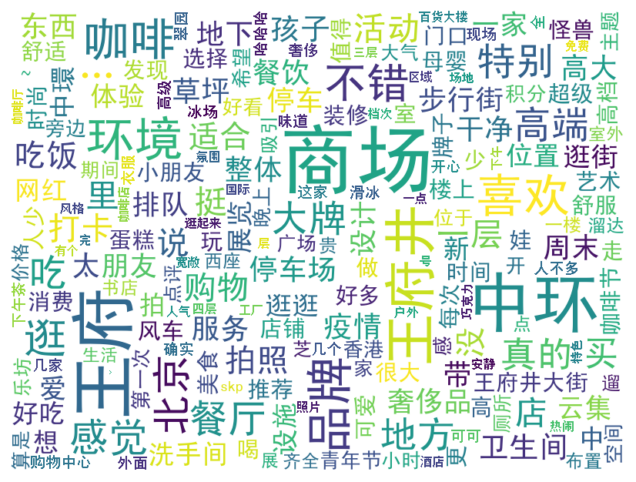

In [12]:
# Load stopwords
stopwords = set(pd.read_csv('stopwords/stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df2)):
    segs = jieba.lcut(df2.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_zhonghuan.png")

# For Store3 : 王府井百货

### 1.  Mean of the Score Data

In [13]:
facs_mean = df3['facs_score'].mean()
envr_mean = df3['envr_score'].mean()
serv_mean = df3['serv_score'].mean()
avg_mean = df3['avg_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)
avg_mean = round(avg_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean, avg_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv', 'avg'])

print(df)

      Score Mean
facs        4.54
envr        4.56
serv        4.47
avg         4.52


### 2. Distribution of the Score Data

In [14]:
facs_score_counts = df3['facs_score'].value_counts().sort_index()
envr_score_counts = df3['envr_score'].value_counts().sort_index()
serv_score_counts = df3['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,11,12,28
1.0,1,1,2
1.5,2,1,7
2.0,1,2,3
2.5,17,13,14
3.0,18,17,25
3.5,89,88,106
4.0,286,276,296
4.5,511,496,497
5.0,851,881,809


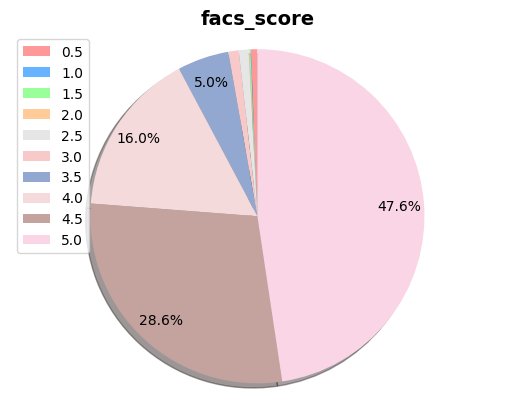

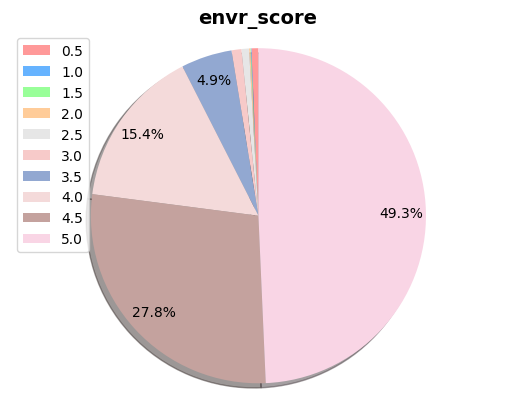

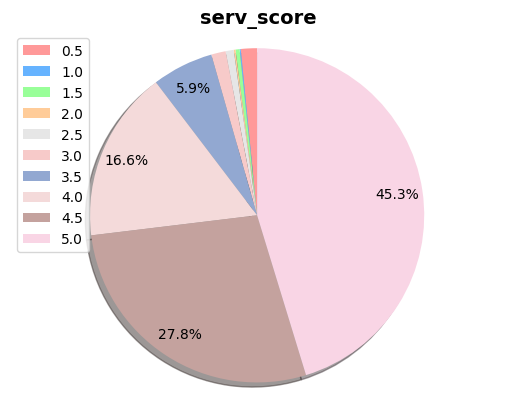

In [15]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    
    # Save the chart with the title as the filename
    plt.savefig(f"../images/{title}_baihuo.png")
    
    # Show the chart
    plt.show()


### 3. Counting the Number of Different Years of 'Time'

In [16]:
df3['time'] = pd.to_datetime(df3['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df3['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

     Year  Count
0  2020.0   1000
1  2021.0    408
2  2022.0    243
3  2023.0    136


### 4. Simple Splitting and Wordcloud for Review Text 

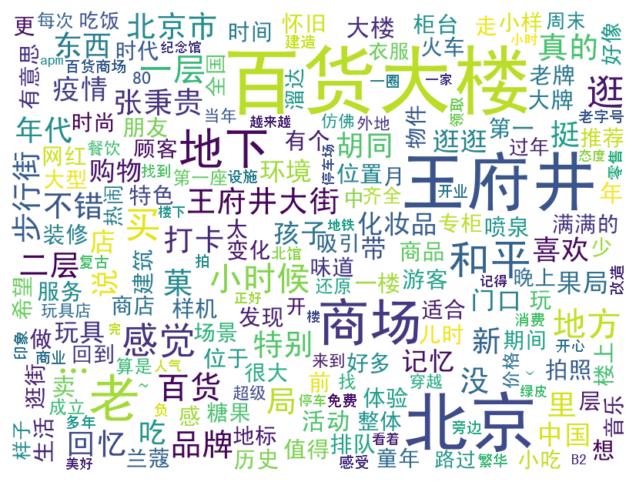

In [17]:
# Load stopwords
stopwords = set(pd.read_csv('stopwords/stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df3)):
    segs = jieba.lcut(df3.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_baihuo.png")

# For Store4 : 东方新天地

### 1.  Mean of the Score Data

In [18]:
facs_mean = df4['facs_score'].mean()
envr_mean = df4['envr_score'].mean()
serv_mean = df4['serv_score'].mean()
avg_mean = df4['avg_score'].mean()

# round the means to two decimal places
facs_mean = round(facs_mean, 2)
envr_mean = round(envr_mean, 2)
serv_mean = round(serv_mean, 2)
avg_mean = round(avg_mean, 2)

# create a dictionary with the means
data = {'Score Mean': [facs_mean, envr_mean, serv_mean, avg_mean]}

# create the DataFrame
df = pd.DataFrame(data, index=['facs', 'envr', 'serv', 'avg'])

print(df)

      Score Mean
facs        4.42
envr        4.45
serv        4.30
avg         4.39


### 2. Distribution of the Score Data

In [19]:
facs_score_counts = df4['facs_score'].value_counts().sort_index()
envr_score_counts = df4['envr_score'].value_counts().sort_index()
serv_score_counts = df4['serv_score'].value_counts().sort_index()

# Combine the three Series objects into one DataFrame object.
df = pd.concat([facs_score_counts, envr_score_counts, serv_score_counts], axis=1)
df.columns = ['facs_score', 'envr_score', 'serv_score']

df

,facs_score,envr_score,serv_score
0.5,27,25,50
1.0,3,2,3
1.5,3,1,7
2.0,3,1,1
2.5,16,15,12
3.0,19,13,20
3.5,74,78,89
4.0,214,211,232
4.5,369,359,367
5.0,540,563,487


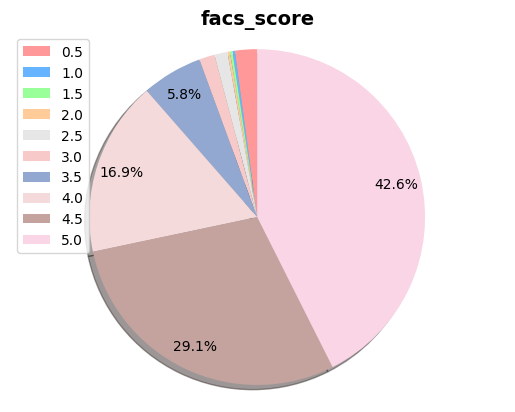

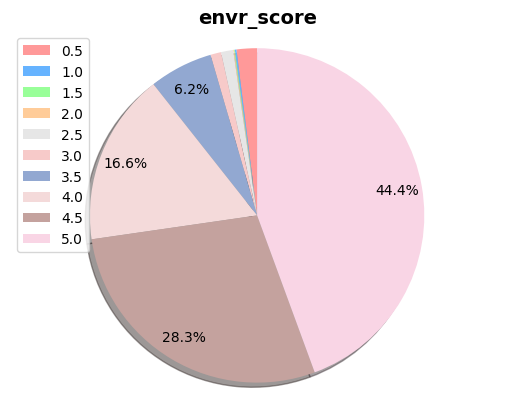

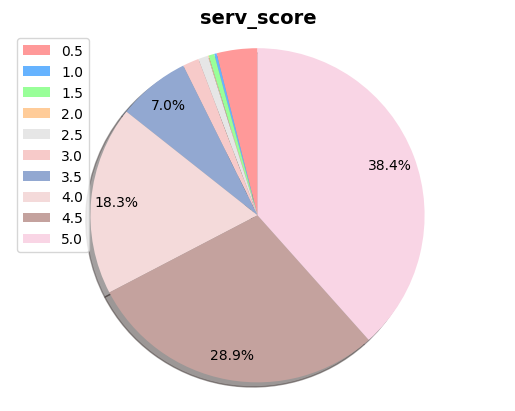

In [20]:
# Define colors and labels
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#e6e6e6', '#f7cac9', '#92a8d1', '#f4dada', '#c4a29e', '#f9d5e5']
labels = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

# Loop through each column
for col in df.columns:
    # Get data and title
    data = df[col].tolist()
    title = col
    
    # Calculate the percentages and plot the pie chart
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(data, colors=colors, autopct=lambda pct: f"{pct:.1f}%" if pct >= 4 else '', startangle=90, pctdistance=0.85, labeldistance=1.1, shadow=True)
    ax.axis('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Set the style of the text labels
    for text in texts:
        text.set_color('grey')

    # Add a legend
    plt.legend(labels, loc='upper left')
    
    # Save the chart with the title as the filename
    plt.savefig(f"../images/{title}_xintiandi.png")
    
    # Show the chart
    plt.show()

### 3. Counting the Number of Different Years of 'Time'

In [21]:
df4['time'] = pd.to_datetime(df4['time'])

# Group the data by year and count the number of data in each year.
year_count = df1.groupby(df4['time'].dt.year)['user_name'].count()

# Convert the result into a tabular form
result_df = pd.DataFrame({'Year': year_count.index, 'Count': year_count.values})

print(result_df)

     Year  Count
0  2020.0    649
1  2021.0    331
2  2022.0    168
3  2023.0    120


### 4. Simple Splitting and Wordcloud for Review Text 

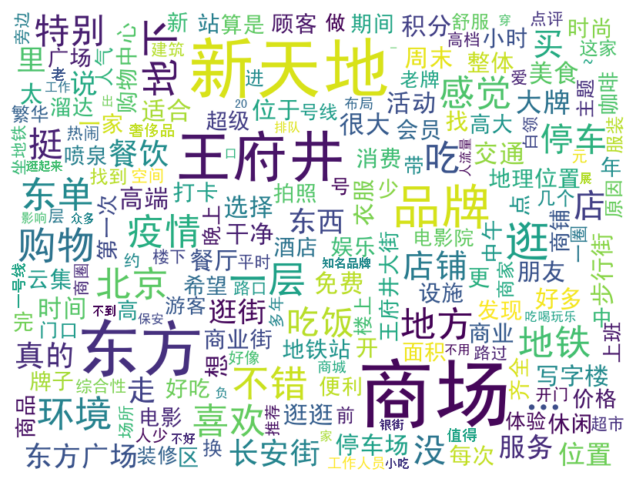

In [22]:
# Load stopwords
stopwords = set(pd.read_csv('stopwords/stopwords.txt', index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='utf-8').stopword)

# Tokenization and stopword filtering
words = []
for i in range(len(df4)):
    segs = jieba.lcut(df4.iloc[i]['review'])
    for seg in segs:
        if seg not in stopwords:
            words.append(seg)

# Count word frequency
word_count = pd.Series(words).value_counts()

# Draw word cloud
wordcloud = WordCloud(font_path='simhei.ttf', background_color='white', width=800, height=600, stopwords=STOPWORDS, max_words=200, max_font_size=100).generate_from_frequencies(word_count)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to a file
plt.savefig("../images/wordcloud_xintiandi.png")